<a href="https://colab.research.google.com/github/pemiran1/Capstone-Two-Airline-Satisfaction-Project/blob/main/Predicting_Airline_Passenger_Satisfaction_Modeling_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Airline Passenger Satisfaction - Modeling 
Capstone Project Two- Springboard Data Science 
Jupyter Notebook by: Patricia Miranda

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1. Topic: 
The topic of my project is to predict Airline Passanger satisfaction based on anonimized airline data. The goals is to predict outcome of passanger satisfaction based on certain criteria, such as Delays, Passanger Class, Gender, Age, etc. 

2. Data: 

The data was obtained from Kaggle, based on anonimized airline data from unknown airline company, data obtained from surveys. The Kaggle data was uploaded to this notebook through Pandas library. 

Data included: 
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

3. Questions to Answer: 

-What are the different types of classes when flying and do they affect passenger satisfaction? 
-What is the age range of passengers? Is there an age group that responds differently to their airline experience and has a different satisfaction? 
-What is the overall satisfaction result (Satisfaction, neutral or dissatisfaction)?
-Based on data of airline, can satisfaction be predicted? 

4. Importing Data and Libraries: 

Previous EDA and pre-processing notebook of this project: 
https://github.com/pemiran1/Capstone-Two-Airline-Satisfaction-Project/blob/4dc995aa41fc8d2895c1969b452bad630e93371f/UNIT24.3%20airline-project-part-1%20(Prior%20to%20Pre-processing)%20(1).ipynb

In [66]:
from google.colab import files
 
 
uploaded = files.upload()

Saving test.csv to test (1).csv


In [67]:
# Libraries imported

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [68]:
#csv file
airline_data = pd.read_csv('test.csv')

In [69]:
#info method on airline data
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [70]:
#head method on airline data
airline_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [71]:
#Check missing data
missing = pd.concat([airline_data.isnull().sum(), 100 * airline_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False)

,count,%
Arrival Delay in Minutes,83,0.319526
Unnamed: 0,0,0.000000
Online boarding,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000


In [72]:
#NaN values dropped from 'Arrival Delay in Minutes' column, 0.3% missing data dropped
airline_data.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [73]:
#Select dtypes
airline_data.select_dtypes(object)

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Female,Loyal Customer,Business travel,Eco,satisfied
1,Female,Loyal Customer,Business travel,Business,satisfied
2,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied
3,Male,Loyal Customer,Business travel,Business,satisfied
4,Female,Loyal Customer,Business travel,Eco,satisfied
...,...,...,...,...,...
25971,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
25972,Male,Loyal Customer,Business travel,Business,satisfied
25973,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
25974,Male,Loyal Customer,Business travel,Business,satisfied


In [74]:
#Value counts method for duplicate id's
airline_data['id'].value_counts().head()

19556     1
113931    1
122974    1
21037     1
45237     1
Name: id, dtype: int64

In [75]:
#count number of times both genders have been used
airline_data['Gender'].value_counts()

Female    13127
Male      12766
Name: Gender, dtype: int64

In [76]:
#count number of times ages have been used
airline_data['Age'].value_counts()

39    720
25    711
40    634
41    631
43    625
     ... 
75     15
74     14
78     11
79     10
85      8
Name: Age, Length: 75, dtype: int64

In [77]:
#count number of times customer types have been used
airline_data['Customer Type'].value_counts()

Loyal Customer       21111
disloyal Customer     4782
Name: Customer Type, dtype: int64

In [78]:
#count number of times Travel types have been used
airline_data['Type of Travel'].value_counts()

Business travel    17980
Personal Travel     7913
Name: Type of Travel, dtype: int64

In [79]:
#count number of times class has been used
airline_data['Class'].value_counts()

Business    12457
Eco         11524
Eco Plus     1912
Name: Class, dtype: int64

In [80]:
#count number of times satisfaction has been marked
airline_data['satisfaction'].value_counts()

neutral or dissatisfied    14528
satisfied                  11365
Name: satisfaction, dtype: int64

In [81]:
#Filter the airline_data dataframe for rows where 'Class' and 'satisfaction' are different,
#group by method
(airline_data[airline_data.Class != airline_data.satisfaction]
 .groupby('Class')['satisfaction']
 .value_counts())

Class     satisfaction           
Business  satisfied                  8660
          neutral or dissatisfied    3797
Eco       neutral or dissatisfied    9293
          satisfied                  2231
Eco Plus  neutral or dissatisfied    1438
          satisfied                   474
Name: satisfaction, dtype: int64

In [82]:
#Filter the airline_data dataframe for rows where 'Gender' and 'satisfaction' are different,
#group by method
(airline_data[airline_data.Gender != airline_data.satisfaction]
 .groupby('Gender')['satisfaction']
 .value_counts())

Gender  satisfaction           
Female  neutral or dissatisfied    7417
        satisfied                  5710
Male    neutral or dissatisfied    7111
        satisfied                  5655
Name: satisfaction, dtype: int64

In [83]:
airline_data[['Class', 'satisfaction']].nunique()

Class           3
satisfaction    2
dtype: int64

In [84]:
airline_data[['Gender', 'satisfaction']].nunique()

Gender          2
satisfaction    2
dtype: int64

In [85]:
#airline_data `describe` method called for a stat summary of columns
airline_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25893.0,12987.838566,7499.175165,0.0,6496.0,12984.0,19482.0,25975.0
id,25893.0,65021.974858,37606.098635,17.0,32209.0,65344.0,97623.0,129877.0
Age,25893.0,39.621983,15.134224,7.0,27.0,40.0,51.0,85.0
Flight Distance,25893.0,1193.753254,998.626779,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25893.0,2.723709,1.334711,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,25893.0,3.046422,1.532971,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,25893.0,2.755996,1.412552,0.0,2.0,3.0,4.0,5.0
Gate location,25893.0,2.976442,1.281661,1.0,2.0,3.0,4.0,5.0
Food and drink,25893.0,3.214923,1.331895,0.0,2.0,3.0,4.0,5.0
Online boarding,25893.0,3.261615,1.355505,0.0,2.0,4.0,4.0,5.0


In [86]:
#Group by Age 
age_summary = airline_data.groupby('Age')
age_summary.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9459,9459,83837,Female,Loyal Customer,78,Business travel,Business,425,2,1,...,2,2,2,2,4,2,2,0,0.0,neutral or dissatisfied
9927,9927,64734,Male,Loyal Customer,78,Business travel,Business,2703,3,4,...,3,3,3,3,2,3,3,5,0.0,neutral or dissatisfied
11684,11684,19880,Male,Loyal Customer,77,Business travel,Business,343,1,2,...,5,5,5,5,3,5,3,0,0.0,satisfied
11983,11983,117306,Female,Loyal Customer,85,Business travel,Business,325,1,1,...,5,5,4,5,4,5,4,0,0.0,satisfied


In [87]:
#Drop missing values for 'id'
missing_id = airline_data[['id', 'Age']].isnull().sum(axis=1)
missing_id.value_counts()/len(missing_id) * 100

0    100.0
dtype: float64

In [88]:
#Remove missing values 
airline_data = airline_data[missing_id != 2]

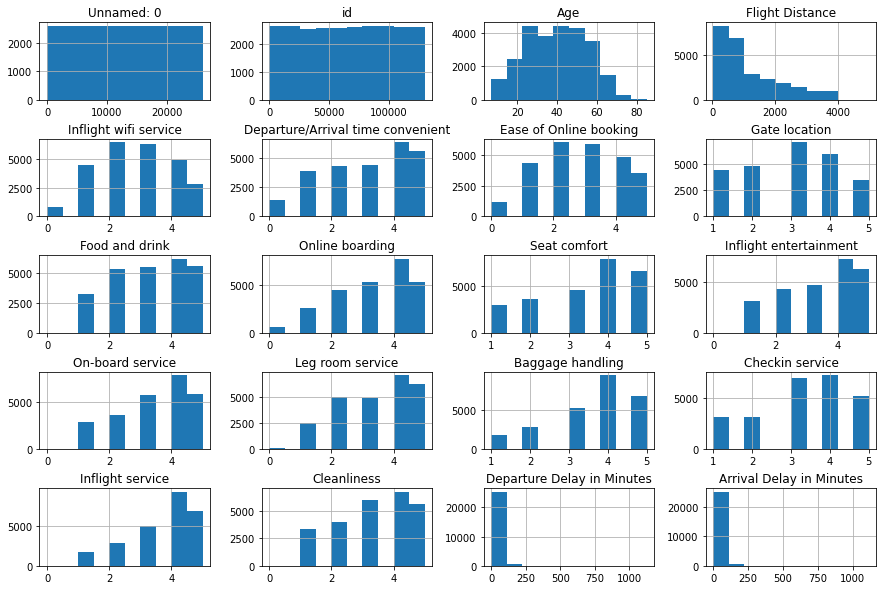

In [89]:
#View Distributions through histograms
airline_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [90]:
#Check number of passangers above the age of 50
airline_data[airline_data['Age'] > 50].T

,0,6,13,14,17,20,22,25,29,31,...,25944,25949,25950,25952,25955,25959,25961,25963,25965,25969
Unnamed: 0,0,6,13,14,17,20,22,25,29,31,...,25944,25949,25950,25952,25955,25959,25961,25963,25965,25969
id,19556,79433,42141,2274,17836,63995,106181,7823,20219,48994,...,123675,37905,111771,76397,56083,74541,126836,65035,15949,120654
Gender,Female,Female,Female,Female,Male,Male,Male,Male,Male,Female,...,Male,Male,Female,Male,Female,Female,Male,Female,Female,Male
Customer Type,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,...,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,52,77,60,52,52,60,55,62,51,56,...,62,56,52,60,65,58,51,65,51,52
Type of Travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,...,Business travel,Business travel,Business travel,Personal Travel,Personal Travel,Business travel,Business travel,Personal Travel,Personal Travel,Business travel
Class,Eco,Business,Business,Business,Eco Plus,Business,Eco,Eco,Eco,Eco,...,Business,Eco,Business,Eco,Eco,Eco,Business,Eco,Eco,Business
Flight Distance,160,3987,451,925,1075,612,302,710,235,308,...,2390,668,1620,931,2475,1171,2296,247,528,280
Inflight wifi service,5,5,1,2,5,4,1,3,4,2,...,2,5,4,2,3,2,3,3,4,3
Departure/Arrival time convenient,4,5,1,2,4,4,2,5,3,3,...,3,0,4,3,4,4,3,4,4,3


In [91]:
#Check number of passangers below the age of 50
airline_data[airline_data['Age'] < 50].T

,1,2,3,4,5,7,8,9,10,11,...,25964,25966,25967,25968,25970,25971,25972,25973,25974,25975
Unnamed: 0,1,2,3,4,5,7,8,9,10,11,...,25964,25966,25967,25968,25970,25971,25972,25973,25974,25975
id,90035,12360,77959,36875,39177,97286,27508,62482,47583,115550,...,111325,30263,90347,86816,25309,78463,71167,37675,90086,34799
Gender,Female,Male,Male,Female,Male,Female,Male,Female,Female,Female,...,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,...,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer,disloyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,36,20,44,49,16,43,47,46,47,33,...,48,42,39,41,36,34,23,17,14,42
Type of Travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,...,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Business travel,Personal Travel,Business travel,Personal Travel
Class,Business,Eco,Business,Eco,Eco,Business,Eco,Business,Eco,Business,...,Eco,Eco,Business,Eco,Eco,Business,Business,Eco,Business,Eco
Flight Distance,2863,192,3377,1182,311,2556,556,1744,1235,325,...,283,1024,404,692,432,526,646,828,1127,264
Inflight wifi service,1,2,0,2,3,2,5,2,4,2,...,3,4,1,2,1,3,4,2,3,2
Departure/Arrival time convenient,1,0,0,3,3,2,2,2,1,5,...,1,4,1,2,5,3,4,5,3,5


In [92]:
#Check if missing Age values
missing_age = airline_data[['Age']].isnull().sum(axis=1)
missing_age.value_counts()/len(missing_age) * 100

0    100.0
dtype: float64

In [93]:
missing = pd.concat([airline_data.isnull().sum(axis=1), 100 * airline_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(10)

,count,%
0,0,0.0
17313,0,0.0
17323,0,0.0
17322,0,0.0
17321,0,0.0
17320,0,0.0
17319,0,0.0
17318,0,0.0
17317,0,0.0
17316,0,0.0


In [94]:
missing['%'].unique()

array([0.])

In [95]:
missing['%'].value_counts()

0.0    25893
Name: %, dtype: int64

In [96]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25893 non-null  int64  
 1   id                                 25893 non-null  int64  
 2   Gender                             25893 non-null  object 
 3   Customer Type                      25893 non-null  object 
 4   Age                                25893 non-null  int64  
 5   Type of Travel                     25893 non-null  object 
 6   Class                              25893 non-null  object 
 7   Flight Distance                    25893 non-null  int64  
 8   Inflight wifi service              25893 non-null  int64  
 9   Departure/Arrival time convenient  25893 non-null  int64  
 10  Ease of Online booking             25893 non-null  int64  
 11  Gate location                      25893 non-null  int

In [97]:
airline_data.shape

(25893, 25)

In [98]:
#Save data as csv file
airline_data.to_csv('airline_data.csv')

In this data set there were 310 missing values under 'Arrival Delay in Minutes' column, approximately 0.3% missing data. These values were dropped, no other missing values remain. 

**EDA Analysis **

In [99]:
airline_info = airline_data[['Age', 'Flight Distance','Baggage handling', 'Departure Delay in Minutes']]
airline_info.head()

,Age,Flight Distance,Baggage handling,Departure Delay in Minutes
0,52,160,5,50
1,36,2863,4,0
2,20,192,3,0
3,44,3377,1,0
4,49,1182,2,0


In [100]:
print(airline_info.describe())
print(airline_info.cov())

                Age  Flight Distance  Baggage handling  \
count  25893.000000     25893.000000      25893.000000   
mean      39.621983      1193.753254          3.632681   
std       15.134224       998.626779          1.176220   
min        7.000000        31.000000          1.000000   
25%       27.000000       414.000000          3.000000   
50%       40.000000       849.000000          4.000000   
75%       51.000000      1744.000000          5.000000   
max       85.000000      4983.000000          5.000000   

       Departure Delay in Minutes  
count                25893.000000  
mean                    14.225080  
std                     37.185919  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                     12.000000  
max                   1128.000000  
                                    Age  Flight Distance  Baggage handling  \
Age                          229.044723      1510.110955         -0.899055 

In [101]:
corr = airline_info.corr(method ='pearson')
print(corr)

                                 Age  Flight Distance  Baggage handling  \
Age                         1.000000         0.099918         -0.050505   
Flight Distance             0.099918         1.000000          0.071178   
Baggage handling           -0.050505         0.071178          1.000000   
Departure Delay in Minutes -0.005452         0.002396          0.000766   

                            Departure Delay in Minutes  
Age                                          -0.005452  
Flight Distance                               0.002396  
Baggage handling                              0.000766  
Departure Delay in Minutes                    1.000000  


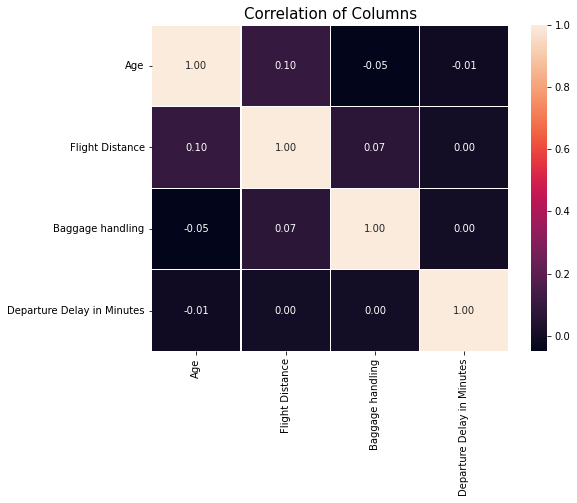

In [102]:
plt.figure(figsize = (8,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt='.2f', linewidths=.30)
plt.title('Correlation of Columns', y =1.05,  size=15)
pos, textvals = plt.yticks()

Here, it is observed that the correlation is shown with color-coded matrices. The value of correlation ranging from -0.05 to 1.

In [103]:
#import libraries for statistical analysis
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter('ignore')

In [104]:
selector = VarianceThreshold()
airline_info_cleaned = selector.fit_transform(airline_info)
print(airline_info_cleaned.shape)
airline_info_cleaned = pd.DataFrame(airline_info_cleaned, columns = ['Age', 'Flight Distance','Baggage handling', 'Departure Delay in Minutes'])
airline_info_cleaned.head()


(25893, 4)


,Age,Flight Distance,Baggage handling,Departure Delay in Minutes
0,52,160,5,50
1,36,2863,4,0
2,20,192,3,0
3,44,3377,1,0
4,49,1182,2,0


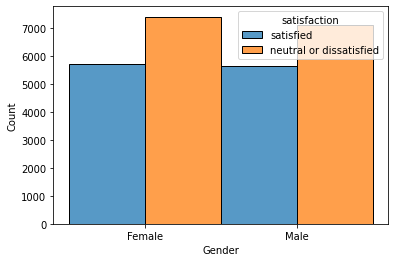

In [105]:
# Creating a plot with airline gender and satisfaction data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="Gender", hue="satisfaction", data=airline_data, stat="count", multiple="dodge")

The bar plot above shows airline Gender vs. Satisfaction data. In general, both genders have higher neutrality or dissatisfaction compared to satisfaction. Although it seems that there is a larger amount of female vs. male passangers overall. 

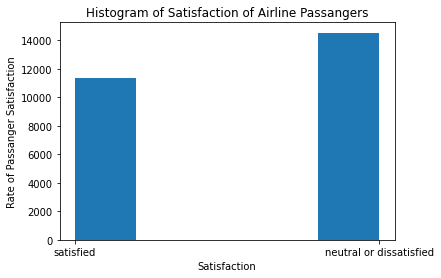

In [106]:
plt.hist(airline_data['satisfaction'], bins = 5)
plt.title('Histogram of Satisfaction of Airline Passangers')
plt.xlabel('Satisfaction')
plt.ylabel('Rate of Passanger Satisfaction')
plt.show()

Above is a histogram representing overall satisfaction. The major category is within 'neutral or dissatisfied'. This data does not contain a separate answer for neutral or dissatisfied so it is hard to tell if they are more neutral or dissatisfied. 

In [107]:
#Make satisfaction column numerical in value
airline_data['satisfaction'] = airline_data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})

In [108]:
#Place passangers into age categories
import pandas as pd

sat_by_age = airline_data[['Age', 'satisfaction']]\
    .groupby(pd.cut(airline_data['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], right = False))[['satisfaction']].count()\
    .rename({'satisfaction': 'total_respondants'}, axis = 'columns')

sat_by_age

,total_respondants
Age,
"[0, 10)",443
"[10, 20)",1918
"[20, 30)",5244
"[30, 40)",5030
"[40, 50)",5923
"[50, 60)",4849
"[60, 70)",2129
"[70, 80)",317
"[80, 90)",40


In [109]:
sat_by_age['satisfied_count'] = airline_data[['Age', 'satisfaction']]\
    .groupby(pd.cut(airline_data['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], right = False))[['satisfaction']].sum()
             
sat_by_age

,total_respondants,satisfied_count
Age,,
"[0, 10)",443,51
"[10, 20)",1918,427
"[20, 30)",5244,1916
"[30, 40)",5030,2093
"[40, 50)",5923,3419
"[50, 60)",4849,2790
"[60, 70)",2129,583
"[70, 80)",317,67
"[80, 90)",40,19


In [110]:
#Compare Passangers by age vs. satisfied or neutral/dissatisfied
sat_by_age['percent_satisfied'] = \
    sat_by_age['satisfied_count'] / sat_by_age['total_respondants']

sat_by_age['percent_unsatisfied_or_neutral'] = \
    (sat_by_age['total_respondants'] - sat_by_age['satisfied_count']) / sat_by_age['total_respondants']

sat_by_age

,total_respondants,satisfied_count,percent_satisfied,percent_unsatisfied_or_neutral
Age,,,,
"[0, 10)",443,51,0.115124,0.884876
"[10, 20)",1918,427,0.222628,0.777372
"[20, 30)",5244,1916,0.365370,0.634630
"[30, 40)",5030,2093,0.416103,0.583897
"[40, 50)",5923,3419,0.577241,0.422759
"[50, 60)",4849,2790,0.575376,0.424624
"[60, 70)",2129,583,0.273837,0.726163
"[70, 80)",317,67,0.211356,0.788644
"[80, 90)",40,19,0.475000,0.525000


In the above table, shown is percent satisfied passangers vs. unsatisfied or neutral passangers based on age range. The majority of passangers are shown to be in 'unsatisfied or neutral' category based on age, except ages 40-50 and 50-60. 

[Text(0, 0.5, 'Age'),
 Text(0.5, 0, 'Satisfaction'),
 Text(0.5, 1.0, 'Age vs. Satisfaction Comparison separated by Gender')]

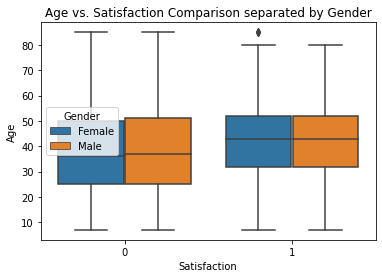

In [111]:
sns.boxplot(data=airline_data, x="satisfaction", y= "Age", hue = 'Gender').set(xlabel = 'Satisfaction', ylabel='Age', title = 'Age vs. Satisfaction Comparison separated by Gender')


In [112]:
#Coverting Categorical data from Gender column to numerical
airline_data1 = pd.get_dummies(airline_data['Gender'])
 
airline_data = pd.concat([airline_data, airline_data1], axis=1).reindex(airline_data.index)
 
airline_data.drop('Gender', axis=1, inplace=True)

#Coverting Categorical data from Customer Type column to numerical

airline_data1 = pd.get_dummies(airline_data['Customer Type'])
 
airline_data = pd.concat([airline_data, airline_data1], axis=1).reindex(airline_data.index)
 
airline_data.drop('Customer Type', axis=1, inplace=True)
 
#Coverting Categorical data from Type of Travel column to numerical

airline_data1 = pd.get_dummies(airline_data['Type of Travel'])
 
airline_data = pd.concat([airline_data, airline_data1], axis=1).reindex(airline_data.index)
 
airline_data.drop('Type of Travel', axis=1, inplace=True)
 
#Coverting Categorical data from Class column to numerical, and printing

airline_data1 = pd.get_dummies(airline_data['Class'])
 
airline_data = pd.concat([airline_data, airline_data1], axis=1).reindex(airline_data.index)
 
airline_data.drop('Class', axis=1, inplace=True)
 
print(airline_data)

       Unnamed: 0     id  Age  Flight Distance  Inflight wifi service  \
0               0  19556   52              160                      5   
1               1  90035   36             2863                      1   
2               2  12360   20              192                      2   
3               3  77959   44             3377                      0   
4               4  36875   49             1182                      2   
...           ...    ...  ...              ...                    ...   
25971       25971  78463   34              526                      3   
25972       25972  71167   23              646                      4   
25973       25973  37675   17              828                      2   
25974       25974  90086   14             1127                      3   
25975       25975  34799   42              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4               

In [113]:
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target = ['satisfaction']

In [114]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Train-test split and computing accuracy
x = airline_data.drop("satisfaction", axis=1).values
y = airline_data["satisfaction"].values

x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)
print('knn_score: ', knn.score(x_test, y_test))

knn_score:  0.5941301409538521


In [115]:
#scale data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [116]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [117]:
#Call RandomForestClassifier on train/test
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42).fit(x_train, y_train)
model.score(x_test, y_test)

0.9559760571538907

In [118]:
#Call confusion_matrix to find type of errors in model
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, model.predict(x_test))

array([[2757,   87],
       [ 141, 2194]])

Building Models of Data: 


Random Forest Model: 

In [119]:
from sklearn.metrics import plot_confusion_matrix

def run_model(model, x_train, y_train, x_test, y_test, verbose=True):
    if verbose == False:
        model.fit(x_train,y_train, verbose=0)
    else:
        model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, x_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc

ROC_AUC = 0.9572189996897936
              precision    recall  f1-score   support

           0    0.95500   0.97011   0.96250      2844
           1    0.96288   0.94433   0.95351      2335

    accuracy                        0.95849      5179
   macro avg    0.95894   0.95722   0.95801      5179
weighted avg    0.95855   0.95849   0.95845      5179



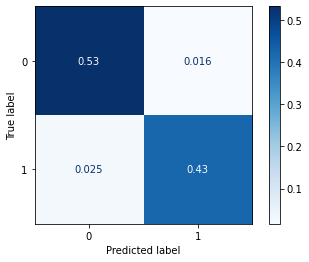

In [120]:
param_randomf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 1200,
         'random_state': 42}

randomf_model = RandomForestClassifier(**param_randomf)
randomf_model, roc_auc_randomf = run_model(randomf_model, x_train, y_train, x_test, y_test)

Light GBM Model: 

ROC_AUC = 0.957692290317043
              precision    recall  f1-score   support

           0    0.95318   0.97363   0.96330      2844
           1    0.96702   0.94176   0.95422      2335

    accuracy                        0.95926      5179
   macro avg    0.96010   0.95769   0.95876      5179
weighted avg    0.95942   0.95926   0.95921      5179



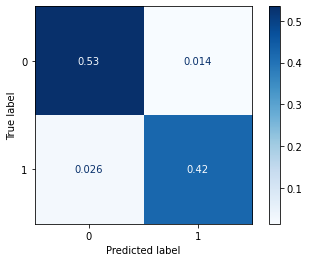

In [122]:
import lightgbm as lgb

param_lgb ={'colsample_bytree': 0.85, 
         'max_depth': 15, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

lgb_model = lgb.LGBMClassifier(**param_lgb)
lgb_model, roc_auc_lgb = run_model(lgb_model, x_train, y_train, x_test, y_test)

In [123]:
auc_scores = [roc_auc_randomf, roc_auc_lgb]
models = pd.DataFrame(auc_scores, index=['Random Forest','LightGBM'], columns=['AUC'])
models.head()

,AUC
Random Forest,0.957219
LightGBM,0.957692


After running both Random Forest and LightGBM models, it appears that they perform almost the same but LightGBM is slightly better with this data. Both models performing hyperparameter tuning. 